# Design /Approach

<img src="diag.jpg">

In [1]:
import pandas as pd 
import csv

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,X1,X2,X3,M,TS00,TO00,TS01,TO01,TS02,TO02,...,TS10,TO10,TS11,TO11,TS12,TO12,TS13,TO13,TS14,TO14
0,-1.25,-0.88,2,14,14:00,22:27,18:00,14:37,13:00,09:39,...,10:00,21:29,10:00,08:47,15:00,10:06,10:00,09:14,NaN,NaN
1,-0.14,-3.21,0,1,17:00,17:11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.23,0.08,3,1,19:00,09:22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.38,-1.30,3,2,12:00,12:38,08:00,09:04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.50,0.22,2,6,14:00,21:59,11:00,17:01,15:00,23:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import copy

For each row , there are multiple send and open time . Split the rows into mutiple rows so that each row has one send time and an open time .


In [6]:
import csv
im_list = []
main_list = []
main_list1 = []

with open('data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            #print(row)
            line_count += 1


            for i,j in enumerate(row):
                try:
                    if(((i+4) % 2 ==0) and row[i+4] != ''):
                        im_list.append(row[0])
                        im_list.append(row[1])
                        im_list.append(row[2])
                        im_list.append(row[3])
                        im_list.append(row[i+4])
                        im_list.append(row[i+5])
                        main_list.append(im_list)
                        im_list = []
                        
                    
                except IndexError:
                    pass
            
            
            #im_list.clear()
    print(f'Processed {line_count} lines.')

Processed 100001 lines.


In [7]:
df = pd.DataFrame(main_list)

In [8]:
df.head()

,0,1,2,3,4,5
0,-1.25,-0.88,2,14,14:00,22:27
1,-1.25,-0.88,2,14,18:00,14:37
2,-1.25,-0.88,2,14,13:00,09:39
3,-1.25,-0.88,2,14,17:00,11:58
4,-1.25,-0.88,2,14,11:00,07:47


In [9]:
df.to_csv('formatteddata.csv')


In [10]:
cols = ['x1','x2','x3','m','sendtime','opentime']
df.columns = cols

In [11]:
df.head()

,x1,x2,x3,m,sendtime,opentime
0,-1.25,-0.88,2,14,14:00,22:27
1,-1.25,-0.88,2,14,18:00,14:37
2,-1.25,-0.88,2,14,13:00,09:39
3,-1.25,-0.88,2,14,17:00,11:58
4,-1.25,-0.88,2,14,11:00,07:47


Create a new columns in dataframe 'timediff' . This is time difference between mail send time and mail open time in secoonds.

In [12]:
from datetime import datetime
badcnt = 0
def time_diff(send,open):
    badcnt = 0
    FMT = '%H:%M'
    try:
        tdelta = datetime.strptime(open, FMT) - datetime.strptime(send, FMT)
        return tdelta.seconds
    except:
        tdelta = 0
        badcnt = badcnt + 1
        print(badcnt)
        return 0
    

In [13]:
df['timediff'] = df.apply(lambda x: time_diff(x['sendtime'],x['opentime']),axis=1)

1
1


In [14]:
df.agg(['count', 'size', 'nunique'])

,x1,x2,x3,m,sendtime,opentime,timediff
count,798960,798960,798960,798960,798960,798960,798960
size,798960,798960,798960,798960,798960,798960,798960
nunique,717,978,4,15,14,1442,1440


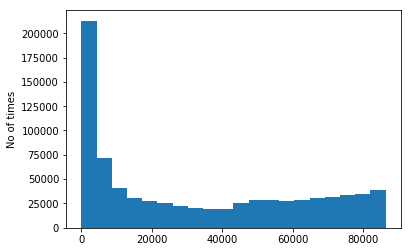

In [15]:
# the timediff has sevral values, plot the distributuion of timediff. Its clear from the distribution that , almost half of the records has
#timediff < 20000 and other half more than 200000

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
#x = np.random.random_integers(1, 100, 5)
plt.hist(df['timediff'], bins=20)
plt.ylabel('No of times')
plt.show()

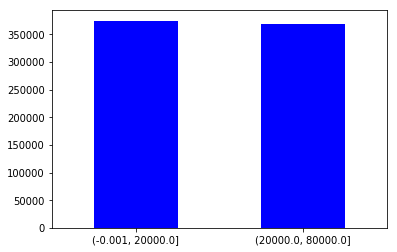

In [16]:
out = pd.cut(df['timediff'], bins=[0,20000,80000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [17]:
#Build regression Model on records whose timediff < 20000 (5.hrs) 

Split the dataframe into two parts , One part with timediff less than 5.5 hrs and other with timediff more than 5.5 hrs.
Build a regression model separately on these two dataframe which will predict timediff . 



In [18]:
df_test = df[df['timediff'] < 20000]

In [19]:
df_test_gt_20k = df[df['timediff'] >= 20000]

In [20]:
df_test = pd.get_dummies(df_test, columns=['x3','sendtime'])

In [21]:
df_test_gt_20k = pd.get_dummies(df_test_gt_20k, columns=['x3','sendtime'])

In [22]:
df_test.columns

Index(['x1', 'x2', 'm', 'opentime', 'timediff', 'x3_0', 'x3_1', 'x3_2', 'x3_3',
       'sendtime_07:00', 'sendtime_08:00', 'sendtime_09:00', 'sendtime_10:00',
       'sendtime_11:00', 'sendtime_12:00', 'sendtime_13:00', 'sendtime_14:00',
       'sendtime_15:00', 'sendtime_16:00', 'sendtime_17:00', 'sendtime_18:00',
       'sendtime_19:00', 'sendtime_20:00'],
      dtype='object')

In [23]:
df_test.head()

,x1,x2,m,opentime,timediff,x3_0,x3_1,x3_2,x3_3,sendtime_07:00,...,sendtime_11:00,sendtime_12:00,sendtime_13:00,sendtime_14:00,sendtime_15:00,sendtime_16:00,sendtime_17:00,sendtime_18:00,sendtime_19:00,sendtime_20:00
5,-1.25,-0.88,14,21:27,12420,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,-1.25,-0.88,14,20:13,4380,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
14,-0.14,-3.21,1,17:11,660,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16,-0.38,-1.3,2,12:38,2280,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
17,-0.38,-1.3,2,09:04,3840,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_x = df_test.drop(['opentime','timediff'],axis=1)

In [25]:
df_x_gt_20k = df_test_gt_20k.drop(['opentime','timediff'],axis=1)

In [26]:
df_x_gt_20k.columns

Index(['x1', 'x2', 'm', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'sendtime_07:00',
       'sendtime_08:00', 'sendtime_09:00', 'sendtime_10:00', 'sendtime_11:00',
       'sendtime_12:00', 'sendtime_13:00', 'sendtime_14:00', 'sendtime_15:00',
       'sendtime_16:00', 'sendtime_17:00', 'sendtime_18:00', 'sendtime_19:00',
       'sendtime_20:00'],
      dtype='object')

In [27]:
df_x.head(2)

,x1,x2,m,x3_0,x3_1,x3_2,x3_3,sendtime_07:00,sendtime_08:00,sendtime_09:00,...,sendtime_11:00,sendtime_12:00,sendtime_13:00,sendtime_14:00,sendtime_15:00,sendtime_16:00,sendtime_17:00,sendtime_18:00,sendtime_19:00,sendtime_20:00
5,-1.25,-0.88,14,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,-1.25,-0.88,14,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df_y = df_test['timediff']

In [29]:
df_y_gt_20k = df_test_gt_20k['timediff']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg= train_test_split(df_x,df_y, test_size=0.3)

In [32]:
X_train_reg_gt_20k, X_test_reg_gt_20k, y_train_reg_gt_20k, y_test_reg_gt_20k= train_test_split(df_x_gt_20k,df_y_gt_20k, test_size=0.3)

In [33]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train_reg, y_train_reg);

In [34]:
rf_gt_20k = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf_gt_20k.fit(X_train_reg_gt_20k, y_train_reg_gt_20k);

In [35]:
import numpy as np

In [37]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test_reg)
# Calculate the absolute errors
# Print out the mean absolute error (mae)
errors = abs(predictions - y_test_reg)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'Seconds.')


Mean Absolute Error: 3464.65 Seconds.


In [38]:
errors1 = abs(y_test_reg-np.mean(y_test_reg))

In [39]:
erros2 = np.mean(errors1)

In [40]:
erros2

4379.900874591518

In [41]:
# clearly  4380.677945957819 >  3464.19  , which means the regression model is able to predict the timediff better than , mean timediff.
 

In [42]:
# Regression model has error < mean average 

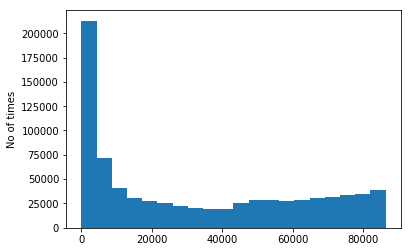

In [43]:
# the timediff has sevral values, plot the distributuion of timediff. Its clear from the distribution that , almost half of the records has
#timediff < 20000 and other half more than 200000

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
#x = np.random.random_integers(1, 100, 5)
plt.hist(df['timediff'], bins=20)
plt.ylabel('No of times')
plt.show()

In [44]:
df['timediff'].min()

0

In [45]:
df['timediff'].max()

86340

In [46]:
df['timediff'].mean()

32543.063082006607

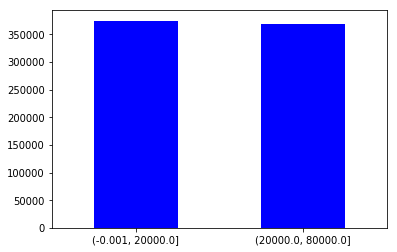

In [47]:
out = pd.cut(df['timediff'], bins=[0,20000,80000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [48]:
# , create two labels 1 and 2 such 1 -> timediff < 200000
# we are going to have classfication model bukd for predciting if the time to open mail will  be less than 5.5 hrs or more than 5.5 hrs

In [49]:

def to_class(timediff):
    if timediff < 20000:
        label = 1
    #elif timediff > 20000 and timediff < 80000:
    elif timediff > 20000:
        label = 2
    else:
        label = 3
    return label



In [50]:
df_1 = df.copy()

In [52]:
df_1['label'] = df_1.apply(lambda x: to_class(x['timediff']),axis=1)

In [53]:
df_1.head()

,x1,x2,x3,m,sendtime,opentime,timediff,label
0,-1.25,-0.88,2,14,14:00,22:27,30420,2
1,-1.25,-0.88,2,14,18:00,14:37,74220,2
2,-1.25,-0.88,2,14,13:00,09:39,74340,2
3,-1.25,-0.88,2,14,17:00,11:58,68280,2
4,-1.25,-0.88,2,14,11:00,07:47,74820,2


In [54]:
df_class = pd.get_dummies(df_1, columns=['x3','sendtime'])

In [55]:
df_class.head()

,x1,x2,m,opentime,timediff,label,x3_0,x3_1,x3_2,x3_3,...,sendtime_11:00,sendtime_12:00,sendtime_13:00,sendtime_14:00,sendtime_15:00,sendtime_16:00,sendtime_17:00,sendtime_18:00,sendtime_19:00,sendtime_20:00
0,-1.25,-0.88,14,22:27,30420,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,-1.25,-0.88,14,14:37,74220,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.25,-0.88,14,09:39,74340,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.25,-0.88,14,11:58,68280,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.25,-0.88,14,07:47,74820,2,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
df_class_x = df_class.drop(['opentime','timediff','label'],axis=1)

In [57]:
df_class_x.head(1)

,x1,x2,m,x3_0,x3_1,x3_2,x3_3,sendtime_07:00,sendtime_08:00,sendtime_09:00,...,sendtime_11:00,sendtime_12:00,sendtime_13:00,sendtime_14:00,sendtime_15:00,sendtime_16:00,sendtime_17:00,sendtime_18:00,sendtime_19:00,sendtime_20:00
0,-1.25,-0.88,14,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
df_class_x.columns

Index(['x1', 'x2', 'm', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'sendtime_07:00',
       'sendtime_08:00', 'sendtime_09:00', 'sendtime_10:00', 'sendtime_11:00',
       'sendtime_12:00', 'sendtime_13:00', 'sendtime_14:00', 'sendtime_15:00',
       'sendtime_16:00', 'sendtime_17:00', 'sendtime_18:00', 'sendtime_19:00',
       'sendtime_20:00'],
      dtype='object')

In [59]:
df_class_y = df_class['label']

In [60]:
X_train, X_test, y_train, y_test= train_test_split(df_class_x,df_class_y, test_size=0.3)

In [61]:
from sklearn.linear_model import LogisticRegression


In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
metrics.accuracy_score(y_pred,y_test)


0.6997763759554086

In [66]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_n=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_n.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_pred = clf_n.predict(X_test)
metrics.accuracy_score(y_pred,y_test)


0.7279713627716031

In [69]:

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[ 74218  37926]
 [ 27276 100268]]
Accuracy Score : 0.7279713627716031
Report : 
              precision    recall  f1-score   support

           1       0.73      0.66      0.69    112144
           2       0.73      0.79      0.75    127544

   micro avg       0.73      0.73      0.73    239688
   macro avg       0.73      0.72      0.72    239688
weighted avg       0.73      0.73      0.73    239688



Here we feed the new record and determine its best send time . 
we will create a sendtime feature , with value starting from 7 and and going till 11 PM . for each time predict if the open time is less 
than 5.5 hrs or more than 5.5 hrs. 
If its less than 5.5 hrs , than use the regression model trained for less than 5.5 hrs and determine the timediff predcited by model for each send time .
then select the send time which gives min timediff predicted by model.

In [70]:
# change the index value of iloc to different value to test it for another records. Run the next two cells to check what is the minumum send time .
qa=X_test.iloc[1].tolist()


In [71]:
import numpy
S=numpy.array(qa)
time1 = []
time2 = []
   
S[7:]=0
found_in_1 = "N"
for i in range(7,21):
    #print(i)
    S[i] = 1
    u= S.tolist()
    u = [ float(x) for x in u ]
    u = [u]
    y_pred_1 = model.predict(u)
    if y_pred_1[0]==1:        
        y_pred_reg=rf.predict(u)
        #print(y_pred_1)
        #print(y_pred_reg)
        time1.append([i,y_pred_reg[0]])
        found_in_1 = "Y"
    else:
        y_pred_reg_gt_20k=rf_gt_20k.predict(u)
        #print(y_pred_1)
        #print(y_pred_reg)
        time2.append([i,y_pred_reg_gt_20k[0]])



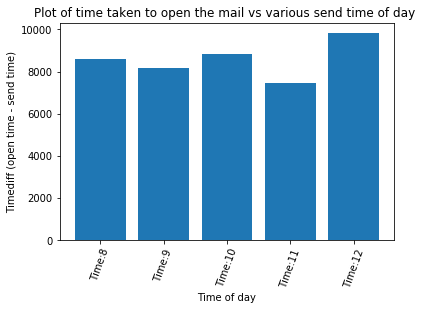

In [72]:
if(found_in_1 == 'Y'):
    time = time1
else:
    time = time2
plt.bar(range(len(time)), [val[1] for val in time], align='center')   
plt.xticks(range(len(time)), ['Time:'+str(val[0]) for val in time])
plt.xticks(rotation=70)

# Add title and axis names
plt.title('Plot of time taken to open the mail vs various send time of day ')
plt.xlabel('Time of day')
plt.ylabel('Timediff (open time - send time)')
 


plt.show()

# Areas of improvement 
1) Trying dfferent models xgboost ,enseble, neural networt etc
2) Grid search to use best hyperparameter to improve model .
3) segmentation better  , currently two segments have been used timediff < 5.5 hrs and more . further split can be dne to make mutiple models to suit each segment 
4) CLuster the data to check if segments can be improved . 
5) Taking more features in data set , probably text content of mail , titlel , image etc.. 
